In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file = '/content/drive/MyDrive/internship/credit_risk_dataset.csv'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
original_df=pd.read_csv(file)

In [ ]:
df=original_df.copy()

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


lets check duplicates

In [ ]:
dups=df.duplicated()

In [ ]:
dups.head()

,0
0,False
1,False
2,False
3,False
4,False


In [ ]:
df[dups]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [ ]:
df.query("person_age==24 & person_income==10000 & person_home_ownership == 'RENT' & loan_int_rate == 7.90")


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2471,24,10000,RENT,8.0,PERSONAL,A,3000,7.9,1,0.3,N,3
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.9,1,0.3,N,3


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(32416, 12)

In [ ]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [ ]:

df['loan_status'].value_counts(normalize =True)

,proportion
loan_status,
0,0.781312
1,0.218688


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#stratify is used for uniformly distribute loan_status 0,1 into train and test like , 78 % 0 , 21 % 1 in both train and test

X, X_test, y, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.2, stratify=df['loan_status'],
                                        shuffle=True)

In [ ]:

y.value_counts(normalize=True)

,proportion
loan_status,
0,0.781313
1,0.218687


In [ ]:
y_test.value_counts(normalize=True)

,proportion
loan_status,
0,0.781308
1,0.218692


In [ ]:

# findinf percentange null in each feature
np.round(df.isna().sum()* 100 / df.shape[0], 3)

,0
person_age,0.000
person_income,0.000
person_home_ownership,0.000
person_emp_length,2.736
loan_intent,0.000
loan_grade,0.000
loan_amnt,0.000
loan_int_rate,9.548
loan_status,0.000
loan_percent_income,0.000


In [ ]:
# find percentage null in each featuee of x_train or X
np.round(X.isna().sum()* 100 / X.shape[0], 3)

,0
person_age,0.000
person_income,0.000
person_home_ownership,0.000
person_emp_length,2.800
loan_intent,0.000
loan_grade,0.000
loan_amnt,0.000
loan_int_rate,9.614
loan_percent_income,0.000
cb_person_default_on_file,0.000


In [ ]:
X.shape

(25932, 11)

In [ ]:

X.dropna().shape

(22763, 11)

In [ ]:
(25932-22763)/25932
# 12 % value

0.12220422643837729

In [ ]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
21415,33,48000,OWN,11.0,HOMEIMPROVEMENT,B,10000,9.99,0.21,N,8
12916,25,85000,MORTGAGE,5.0,DEBTCONSOLIDATION,C,7500,11.03,0.09,Y,3
2938,26,125000,RENT,10.0,MEDICAL,B,3000,12.21,0.02,N,4
19114,29,62000,RENT,4.0,DEBTCONSOLIDATION,C,2300,13.43,0.04,Y,6
6057,24,48000,MORTGAGE,4.0,MEDICAL,B,4200,11.99,0.09,N,4


here we can see that loan_percent_income is a derived feature from loan_amnt & person_income



**loan_percent_income = loan_amnt/person_income**

so to reduce redundancy we remove loan_percent_income feature

In [ ]:

X.drop('loan_percent_income', axis=1, inplace=True)
X_test.drop('loan_percent_income', axis=1, inplace=True)

In [ ]:
for col in X.columns:
  print(col,X[col].nunique())
  print()
  # gives no. of unique values in each features
  if (X[col].nunique() < 10):
    print(X[col].value_counts(normalize=True)*100)
    print()

person_age 58

person_income 3680

person_home_ownership 4

person_home_ownership
RENT        50.320068
MORTGAGE    41.439149
OWN          7.916859
OTHER        0.323924
Name: proportion, dtype: float64

person_emp_length 36

loan_intent 6

loan_intent
EDUCATION            19.809502
MEDICAL              18.787598
VENTURE              17.542033
PERSONAL             16.878760
DEBTCONSOLIDATION    15.968687
HOMEIMPROVEMENT      11.013420
Name: proportion, dtype: float64

loan_grade 7

loan_grade
A    32.932284
B    32.126330
C    19.902052
D    11.121394
E     3.004010
F     0.732685
G     0.181243
Name: proportion, dtype: float64

loan_amnt 710

loan_int_rate 346

cb_person_default_on_file 2

cb_person_default_on_file
N    82.392411
Y    17.607589
Name: proportion, dtype: float64

cb_person_cred_hist_length 29



In [ ]:
X.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
count,25932.000000,2.593200e+04,25206.000000,25932.000000,23439.000000,25932.000000
mean,27.721155,6.589884e+04,4.811315,9611.395187,11.013784,5.793460
std,6.382311,6.333831e+04,4.172822,6339.054572,3.240104,4.052297
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,2.000000
25%,23.000000,3.849500e+04,2.000000,5000.000000,7.900000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.480000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,30.000000


In [ ]:
num_cols = [col for col in X if X[col].dtypes != 'O']
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length']

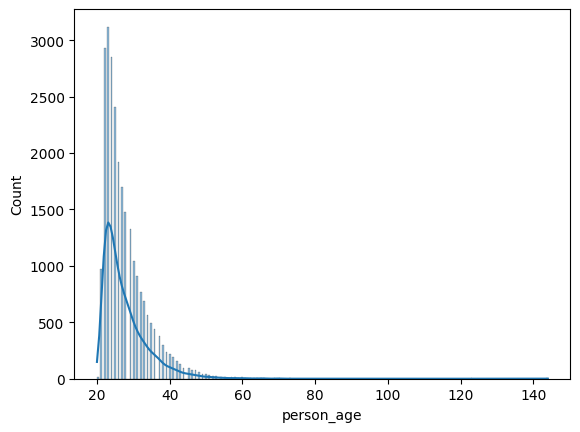

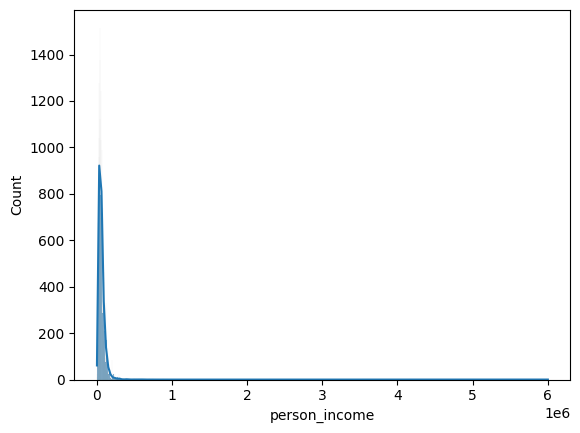

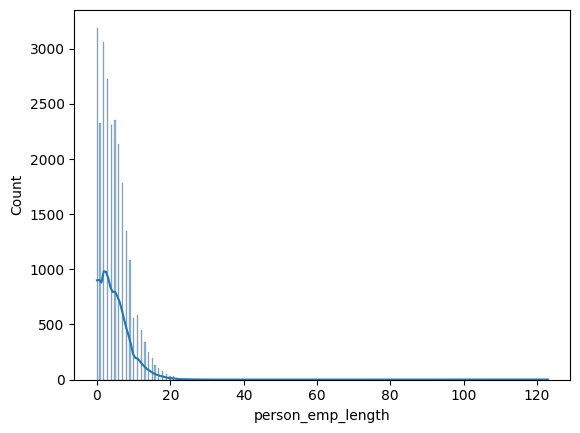

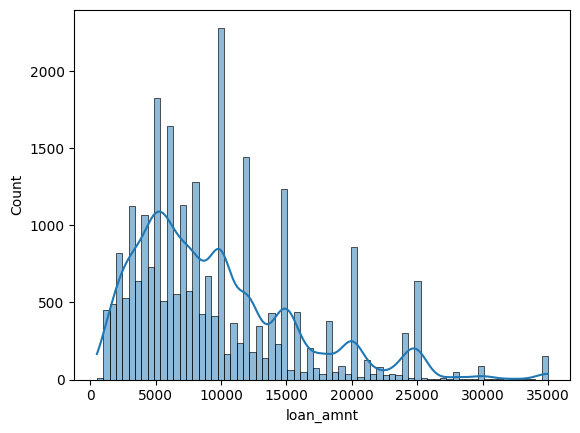

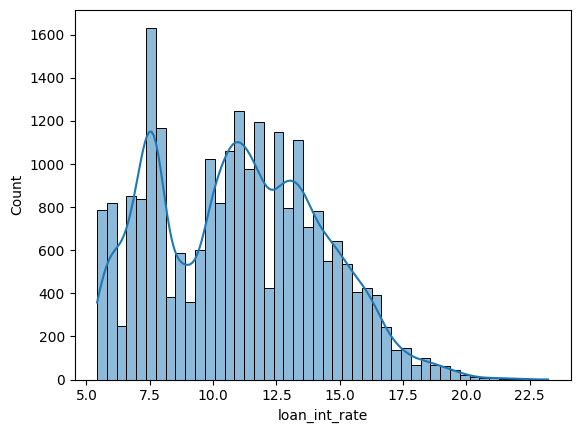

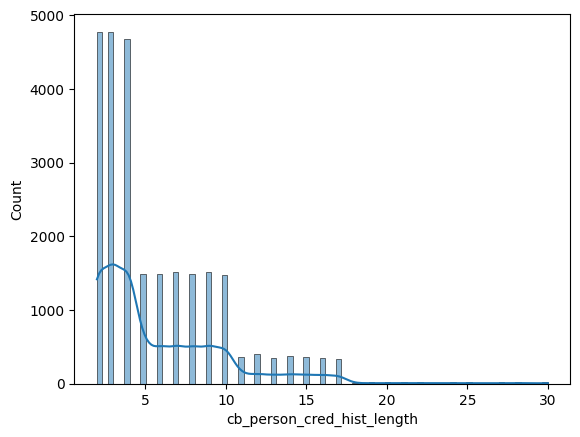

In [ ]:
for col in num_cols:
  sns.histplot(X[col],kde=True)
  plt.show()

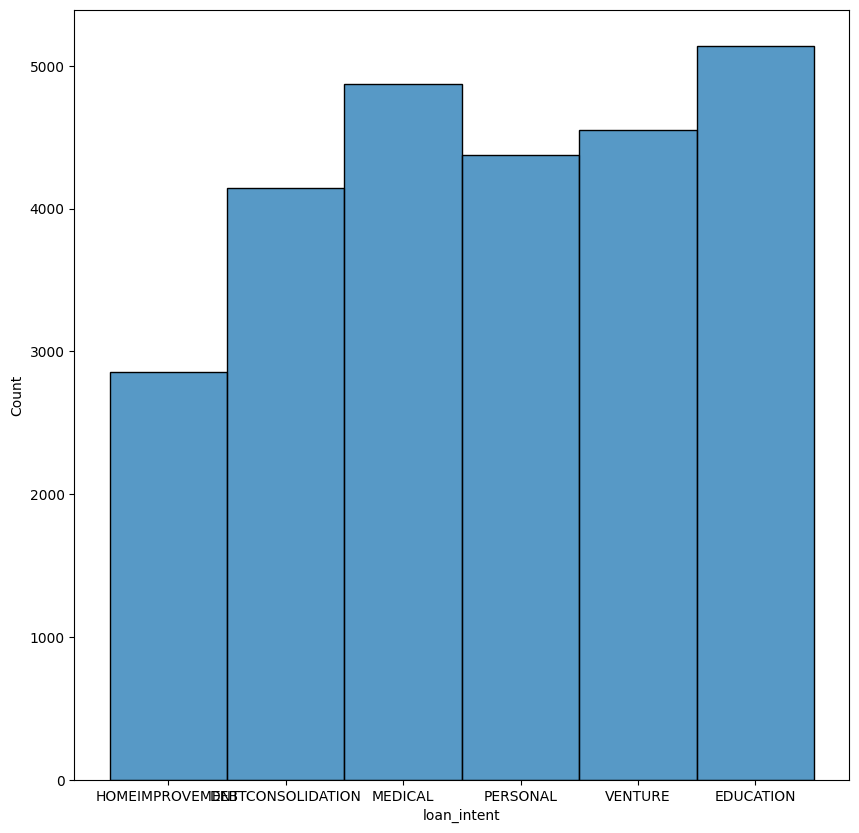

In [ ]:
plt.figure(figsize=(10,10))

sns.histplot(X['loan_intent'])
plt.show()


<Axes: ylabel='person_age'>

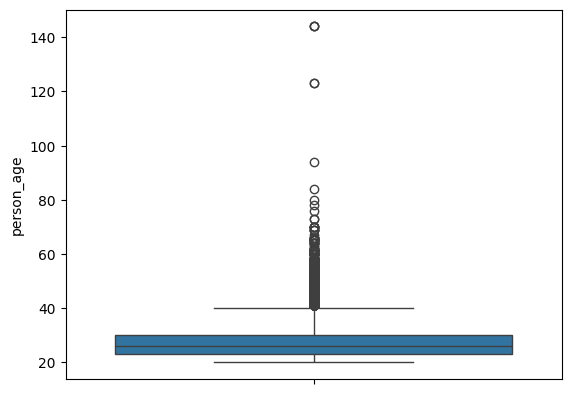

In [ ]:
sns.boxplot(X['person_age'])

In [ ]:
X.loc[X['person_age']>=80, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,N,25
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,N,3
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,N,27
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,N,4
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,N,3
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,N,24
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,N,25


total 8 person are greater than = 80 these are often outlier so we remove them

In [ ]:
X = X.loc[X['person_age']<80, :]

In [ ]:
X['person_age'].describe()

,person_age
count,25924.000000
mean,27.693604
std,6.171185
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,78.000000


<Axes: ylabel='person_age'>

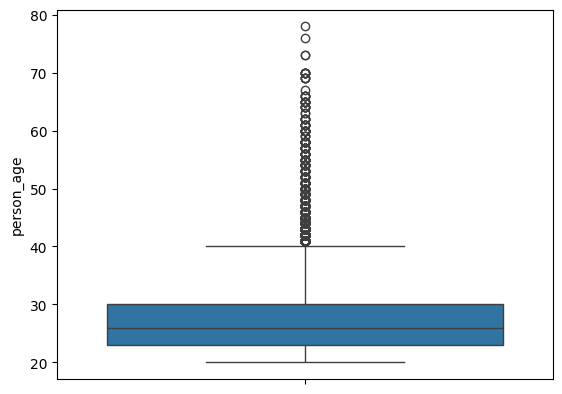

In [ ]:
sns.boxplot(X['person_age'])

In [ ]:
X.shape

(25924, 10)

<Axes: ylabel='person_emp_length'>

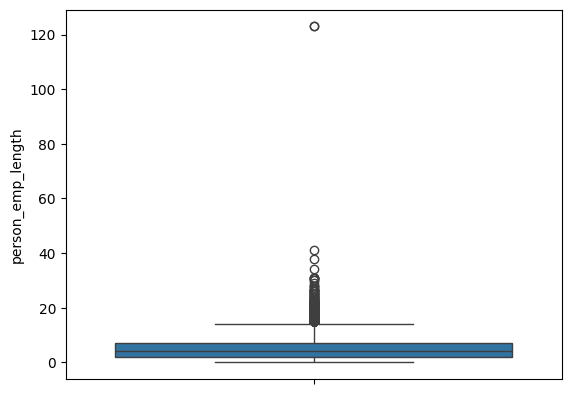

In [ ]:
sns.boxplot(X['person_emp_length'])

In [ ]:
X.loc[X['person_emp_length']<=66, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
21415,33,48000,OWN,11.0,HOMEIMPROVEMENT,B,10000,9.99,N,8
12916,25,85000,MORTGAGE,5.0,DEBTCONSOLIDATION,C,7500,11.03,Y,3
2938,26,125000,RENT,10.0,MEDICAL,B,3000,12.21,N,4
19114,29,62000,RENT,4.0,DEBTCONSOLIDATION,C,2300,13.43,Y,6
6057,24,48000,MORTGAGE,4.0,MEDICAL,B,4200,11.99,N,4
...,...,...,...,...,...,...,...,...,...,...
23921,29,67422,MORTGAGE,13.0,EDUCATION,B,12800,11.49,N,8
27783,29,195000,MORTGAGE,5.0,VENTURE,C,3600,14.26,N,7
24358,27,72000,OWN,2.0,EDUCATION,B,12000,9.99,N,9
2544,23,30000,RENT,0.0,MEDICAL,A,3000,5.79,N,3


**?????**

In [ ]:
X.query("person_age<=person_emp_length+14")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,N,4
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Y,3


In [ ]:
X.query("person_age>person_emp_length")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
21415,33,48000,OWN,11.0,HOMEIMPROVEMENT,B,10000,9.99,N,8
12916,25,85000,MORTGAGE,5.0,DEBTCONSOLIDATION,C,7500,11.03,Y,3
2938,26,125000,RENT,10.0,MEDICAL,B,3000,12.21,N,4
19114,29,62000,RENT,4.0,DEBTCONSOLIDATION,C,2300,13.43,Y,6
6057,24,48000,MORTGAGE,4.0,MEDICAL,B,4200,11.99,N,4
...,...,...,...,...,...,...,...,...,...,...
23921,29,67422,MORTGAGE,13.0,EDUCATION,B,12800,11.49,N,8
27783,29,195000,MORTGAGE,5.0,VENTURE,C,3600,14.26,N,7
24358,27,72000,OWN,2.0,EDUCATION,B,12000,9.99,N,9
2544,23,30000,RENT,0.0,MEDICAL,A,3000,5.79,N,3


In [ ]:
X.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,726
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,2491
cb_person_default_on_file,0
cb_person_cred_hist_length,0


In [ ]:
X.loc[X['person_emp_length'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
21692,27,50000,OWN,NaN,PERSONAL,B,5125,9.99,N,10
1793,24,24000,RENT,NaN,HOMEIMPROVEMENT,B,2000,12.69,N,2
741,22,21600,MORTGAGE,NaN,EDUCATION,A,4025,5.42,N,4
29613,36,33600,OWN,NaN,VENTURE,E,15000,18.39,N,16
14026,23,88000,MORTGAGE,NaN,VENTURE,C,1000,13.49,Y,4
...,...,...,...,...,...,...,...,...,...,...
18508,33,12000,RENT,NaN,EDUCATION,A,1000,7.88,N,7
27400,28,21084,OWN,NaN,EDUCATION,A,7750,7.51,N,9
16854,24,75000,MORTGAGE,NaN,PERSONAL,A,7000,7.66,N,3
21492,28,23000,RENT,NaN,MEDICAL,B,6000,8.88,N,5


so we don't

**Using <= alone ignores NaN because comparisons involving NaN return False.**
**To include NaN, you must explicitly check for it with .isna() or .isnull().**

In [ ]:
X=X.loc[(X['person_emp_length']<66) | (X['person_emp_length'].isna()), :]

In [ ]:
X.shape

(25922, 10)

In [ ]:
y.shape

(25932,)

In [ ]:
y=y[X.index]

In [ ]:
y.shape

(25922,)

In [ ]:
cat_cols=[]
for col in (X.columns):
   if(X[col].dtypes=='O'):
    cat_cols.append(col)
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [ ]:
# using list comprehension
cat_cols=[col for col in X.columns if X[col].dtypes=='O']
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

# NOW we Preprocess our model with using pipeline as well as manually

# 1: Manual Training or Ad-hoc Training:


*   Refers to training where preprocessing, feature engineering, and modeling are performed manually and separately, rather than in an automated, integrated manner.




we have cat_cols and num_cols

In [ ]:
print(cat_cols)
print(num_cols)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']


In [ ]:
#lets check num_cols first
X[num_cols].isna().sum()

,0
person_age,0
person_income,0
person_emp_length,726
loan_amnt,0
loan_int_rate,2491
cb_person_cred_hist_length,0


* **person_emp_length** is Nan (maybe because they dont have any job or ?)
person_imcome is not Nan in any rows means that everyone has income source like business

* **loan_int_rate**  seems like it doesnt have straight forward connection with other attributes lets check heatmap



lets check wheater person_emp_length is MCAR,MAR,MNAR

In [ ]:
X['emp_length_missing']=X['person_emp_length'].isna()

In [ ]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing
21415,33,48000,OWN,11.0,HOMEIMPROVEMENT,B,10000,9.99,N,8,False
12916,25,85000,MORTGAGE,5.0,DEBTCONSOLIDATION,C,7500,11.03,Y,3,False
2938,26,125000,RENT,10.0,MEDICAL,B,3000,12.21,N,4,False
19114,29,62000,RENT,4.0,DEBTCONSOLIDATION,C,2300,13.43,Y,6,False
6057,24,48000,MORTGAGE,4.0,MEDICAL,B,4200,11.99,N,4,False


In [ ]:
missing_group = X.groupby('emp_length_missing')[['person_income', 'loan_int_rate']].mean()
print(missing_group)


                    person_income  loan_int_rate
emp_length_missing                              
False                66246.714637      11.043450
True                 45034.053719      10.012101


* When person_emp_length is not missing (False), the average income is 66,246.71.
When person_emp_length is missing (True), the average income drops to 45,034.05.
Interpretation: This significant difference in income suggests a relationship between missing person_emp_length and person_income.

* It implies that individuals without recorded employment length tend to have lower incomes, possibly indicating non-traditional income sources like freelancing or investments.

In [ ]:
X.loc[X['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing
19829,29,36000,MORTGAGE,2.0,PERSONAL,D,20000,NaN,N,6,False
23768,32,96000,RENT,8.0,HOMEIMPROVEMENT,A,9500,NaN,N,5,False
9743,22,64000,MORTGAGE,6.0,EDUCATION,A,6000,NaN,N,4,False
15644,24,150000,MORTGAGE,3.0,MEDICAL,C,15000,NaN,N,2,False
16203,25,60000,RENT,1.0,EDUCATION,A,10000,NaN,N,4,False
...,...,...,...,...,...,...,...,...,...,...,...
32404,62,66000,RENT,2.0,EDUCATION,B,6000,NaN,N,23,False
10848,24,70000,MORTGAGE,3.0,DEBTCONSOLIDATION,B,11000,NaN,N,3,False
22642,35,56566,MORTGAGE,3.0,EDUCATION,A,3200,NaN,N,6,False
18499,29,53313,RENT,13.0,MEDICAL,B,19850,NaN,N,7,False


<Axes: >

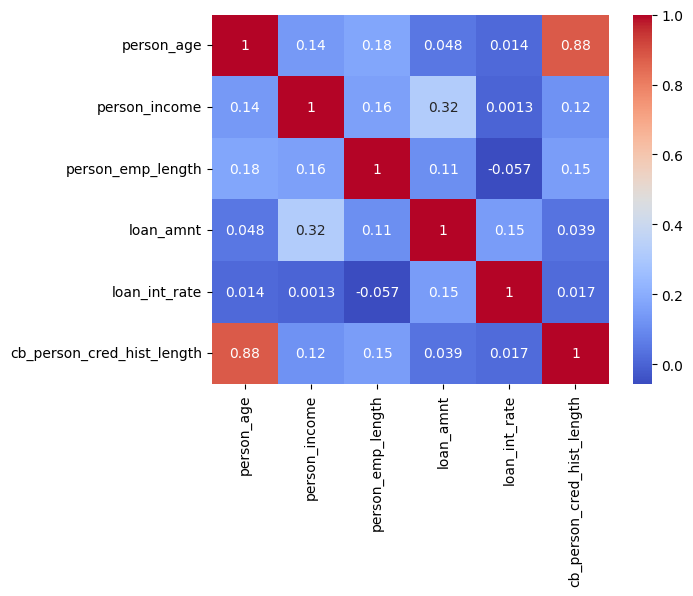

In [ ]:
Corr_matrix=X[num_cols].corr()
sns.heatmap(Corr_matrix,cmap='coolwarm',annot=True)

no visible difference has seen , so i am using this too as MAR

In [ ]:
#remove the temprary columns
X.drop('emp_length_missing',axis=1,inplace=True)

the missing Values are ***MAR***(missing at Random)
there is no direct relation ship so we try to impute them with iterative Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer=IterativeImputer()
#learnt imputation patterns from X
imputer.fit(X[num_cols])

IterativeImputer()

Key Points to Remember:
* Fit the imputer only on X_train.
* Transform both X_train and X_test using the same fitted imputer.
* This ensures consistency and avoids data leakage from the test set into the training process.

In [ ]:
# impute missing vlaues in X,X_test
X[num_cols]=imputer.transform(X[num_cols])
X_test[num_cols]=imputer.transform(X_test[num_cols])

In [ ]:
X.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
cb_person_default_on_file,0
cb_person_cred_hist_length,0


In [ ]:
X_test.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
cb_person_default_on_file,0
cb_person_cred_hist_length,0


Now check for scaling , person_income is in very large sclae then other we need to scale them

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit(X[num_cols])

StandardScaler()

In [ ]:
X[num_cols]=scaler.transform(X[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [ ]:
X[num_cols].head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
21415,0.859806,-0.342792,1.557791,0.061557,-0.332131,0.546015
12916,-0.436567,0.375702,0.051702,-0.332954,0.004959,-0.689909
2938,-0.274520,1.152452,1.306776,-1.043074,0.387426,-0.442725
19114,0.211620,-0.070929,-0.199313,-1.153538,0.782858,0.051645
6057,-0.598614,-0.342792,-0.199313,-0.853709,0.316119,-0.442725


In [ ]:
X_test[num_cols].head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
31162,2.642319,0.278608,2.310835,0.061557,-1.615665,2.276310
17831,-0.598614,-0.536979,-1.203372,0.377166,0.283706,-0.689909
21226,0.859806,0.934962,0.804746,-0.727465,0.264259,0.793200
8789,-0.922707,-0.109767,-0.701343,-0.964172,-0.332131,-0.937094
5717,-0.760660,-0.536979,-0.952358,-0.695904,-1.016034,-0.689909


now encode categorical data

In [ ]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for col in cat_cols:
  print(X[col].value_counts())
  print()

person_home_ownership
RENT        13043
MORTGAGE    10742
OWN          2053
OTHER          84
Name: count, dtype: int64

loan_intent
EDUCATION            5135
MEDICAL              4870
VENTURE              4546
PERSONAL             4374
DEBTCONSOLIDATION    4141
HOMEIMPROVEMENT      2856
Name: count, dtype: int64

loan_grade
A    8538
B    8327
C    5158
D    2883
E     779
F     190
G      47
Name: count, dtype: int64

cb_person_default_on_file
N    21357
Y     4565
Name: count, dtype: int64



we can simply use onehotencoder with this they all are different independent with each other

In [ ]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

* sparse_output=False: This ensures that the output is returned as a dense array (a regular NumPy array) instead of a sparse matrix. It's useful if you want a direct view of the transformed data.
* handle_unknown='ignore': This tells the encoder to ignore unknown categories (i.e., categories not present during the fitting stage) instead of raising an error.

In [ ]:
encoder.fit(X[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
X_encoded_cols=encoder.transform(X[cat_cols])
X_test_encoder_cols=encoder.transform(X_test[cat_cols])

In [ ]:
encoder.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [ ]:
encoded_df=pd.DataFrame(X_encoded_cols,columns=encoder.get_feature_names_out(cat_cols),index=X.index)
#get_feature_names_out(cat_cols) getting proper featuer name (appending real name with category) # here we set index to be same as orignal avoiding inconsistency

In [ ]:
encoded_df.shape

(25922, 19)

In [ ]:
X.shape

(25922, 10)

In [ ]:
encoded_df.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
21415,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12916,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19114,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6057,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
21415,0.859806,-0.342792,OWN,1.557791,HOMEIMPROVEMENT,B,0.061557,-0.332131,N,0.546015
12916,-0.436567,0.375702,MORTGAGE,0.051702,DEBTCONSOLIDATION,C,-0.332954,0.004959,Y,-0.689909
2938,-0.274520,1.152452,RENT,1.306776,MEDICAL,B,-1.043074,0.387426,N,-0.442725
19114,0.211620,-0.070929,RENT,-0.199313,DEBTCONSOLIDATION,C,-1.153538,0.782858,Y,0.051645
6057,-0.598614,-0.342792,MORTGAGE,-0.199313,MEDICAL,B,-0.853709,0.316119,N,-0.442725


In [ ]:
X.index.equals(encoded_df.index)

True

the encoded df has differnt index so we need to concatinate based on index properly

In [ ]:
X_test_encoded_df=pd.DataFrame(X_test_encoder_cols,columns=encoder.get_feature_names_out(cat_cols),index=X_test.index)

In [ ]:
X_test_encoded_df.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
31162,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17831,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21226,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8789,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5717,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


now lets concatenate with orginal

In [ ]:
X=pd.concat([X,encoded_df],axis=1)
X_test=pd.concat([X_test,X_test_encoded_df],axis=1)

In [ ]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
21415,0.859806,-0.342792,OWN,1.557791,HOMEIMPROVEMENT,B,0.061557,-0.332131,N,0.546015,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12916,-0.436567,0.375702,MORTGAGE,0.051702,DEBTCONSOLIDATION,C,-0.332954,0.004959,Y,-0.689909,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2938,-0.274520,1.152452,RENT,1.306776,MEDICAL,B,-1.043074,0.387426,N,-0.442725,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19114,0.211620,-0.070929,RENT,-0.199313,DEBTCONSOLIDATION,C,-1.153538,0.782858,Y,0.051645,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6057,-0.598614,-0.342792,MORTGAGE,-0.199313,MEDICAL,B,-0.853709,0.316119,N,-0.442725,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X.drop(cat_cols,axis=1,inplace=True)
X_test.drop(cat_cols,axis=1,inplace=True)

In [ ]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
21415,0.859806,-0.342792,1.557791,0.061557,-0.332131,0.546015,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12916,-0.436567,0.375702,0.051702,-0.332954,0.004959,-0.689909,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2938,-0.274520,1.152452,1.306776,-1.043074,0.387426,-0.442725,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19114,0.211620,-0.070929,-0.199313,-1.153538,0.782858,0.051645,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6057,-0.598614,-0.342792,-0.199313,-0.853709,0.316119,-0.442725,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
31162,2.642319,0.278608,2.310835,0.061557,-1.615665,2.276310,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17831,-0.598614,-0.536979,-1.203372,0.377166,0.283706,-0.689909,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21226,0.859806,0.934962,0.804746,-0.727465,0.264259,0.793200,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8789,-0.922707,-0.109767,-0.701343,-0.964172,-0.332131,-0.937094,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5717,-0.760660,-0.536979,-0.952358,-0.695904,-1.016034,-0.689909,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:

X_test.isna().sum()

,0
person_age,0
person_income,0
person_emp_length,0
loan_amnt,0
loan_int_rate,0
cb_person_cred_hist_length,0
person_home_ownership_MORTGAGE,0
person_home_ownership_OTHER,0
person_home_ownership_OWN,0
person_home_ownership_RENT,0



# MAnual Training

great we have succesfully completed the preprocessing steps .
Now Training
* Logistic Regression
* Random Forest
* Gradient Boosting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

LR_model=LogisticRegression(random_state=0)
LR_model.fit(X,y)

LogisticRegression(random_state=0)

In [ ]:
LR_pred=LR_model.predict(X_test)
LR_report = classification_report(y_test, LR_pred)

print(LR_report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5066
           1       0.77      0.45      0.57      1418

    accuracy                           0.85      6484
   macro avg       0.82      0.71      0.74      6484
weighted avg       0.84      0.85      0.84      6484



In [ ]:
LR_model.score(X_test,y_test)

0.8505552128315854

In [ ]:
# Test different hyperparameters
penalties = ['l1', 'l2']
regularization_strengths = [0.001, 0.01, 0.1, 1, 10]
solvers = ['liblinear', 'saga']

for penalty in penalties:
    for C in regularization_strengths:
        for solver in solvers:
            try:
                model = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42, max_iter=500)
                model.fit(X, y)
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                print(f"Penalty: {penalty}, C: {C}, Solver: {solver}, Accuracy: {accuracy:.4f}")
            except Exception as e:
                print(f"Skipping combination (Penalty={penalty}, Solver={solver}): {e}")

Penalty: l1, C: 0.001, Solver: liblinear, Accuracy: 0.7946
Penalty: l1, C: 0.001, Solver: saga, Accuracy: 0.7886
Penalty: l1, C: 0.01, Solver: liblinear, Accuracy: 0.8396
Penalty: l1, C: 0.01, Solver: saga, Accuracy: 0.8388
Penalty: l1, C: 0.1, Solver: liblinear, Accuracy: 0.8489
Penalty: l1, C: 0.1, Solver: saga, Accuracy: 0.8492
Penalty: l1, C: 1, Solver: liblinear, Accuracy: 0.8510


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l1, C: 1, Solver: saga, Accuracy: 0.8509
Penalty: l1, C: 10, Solver: liblinear, Accuracy: 0.8510


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l1, C: 10, Solver: saga, Accuracy: 0.8510
Penalty: l2, C: 0.001, Solver: liblinear, Accuracy: 0.8279
Penalty: l2, C: 0.001, Solver: saga, Accuracy: 0.8250
Penalty: l2, C: 0.01, Solver: liblinear, Accuracy: 0.8408
Penalty: l2, C: 0.01, Solver: saga, Accuracy: 0.8408
Penalty: l2, C: 0.1, Solver: liblinear, Accuracy: 0.8484
Penalty: l2, C: 0.1, Solver: saga, Accuracy: 0.8484
Penalty: l2, C: 1, Solver: liblinear, Accuracy: 0.8507


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Penalty: l2, C: 1, Solver: saga, Accuracy: 0.8507
Penalty: l2, C: 10, Solver: liblinear, Accuracy: 0.8510
Penalty: l2, C: 10, Solver: saga, Accuracy: 0.8510


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.model_selection import learning_curve
a,b,c = learning_curve(LR_model, X, y,n_jobs=-1, scoring='accuracy')

The learning_curve function returns three main outputs:

* a: Array of training set sizes used (e.g., 10%, 20%, ..., 100% of the dataset).
* b: Training scores for each training set size (a 2D array where rows are training sizes, and columns are cross-validation folds).
* c: Validation scores for each training set size (a 2D array similar to b).

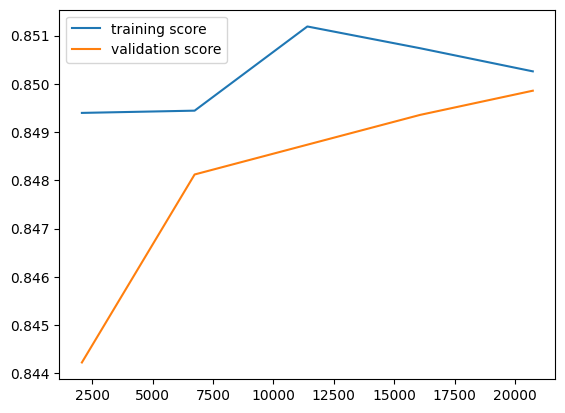

In [ ]:
plt.plot(a,b.mean(axis=1),label="training score")
plt.plot(a,c.mean(axis=1),label="validation score")
plt.legend()
plt.show()

# MOdel 2 : RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_model=RandomForestClassifier(random_state=0)
Random_model.fit(X,y)

RandomForestClassifier(random_state=0)

In [ ]:
random_pred=Random_model.predict(X_test)
random_report = classification_report(y_test, random_pred)

print(random_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5066
           1       0.94      0.70      0.80      1418

    accuracy                           0.93      6484
   macro avg       0.93      0.84      0.88      6484
weighted avg       0.93      0.93      0.92      6484



using default parameters of randomforest accuracy is .93 with good f1 score

In [ ]:
Random_model.score(X_test,y_test)

0.9250462677359654

In [ ]:
a,b,c = learning_curve(Random_model, X, y,n_jobs=-1, scoring='accuracy')

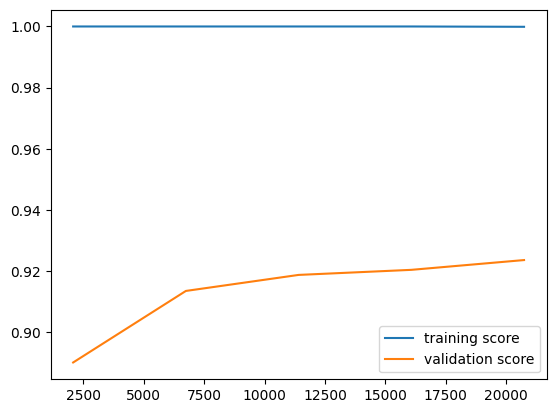

In [ ]:
plt.plot(a,b.mean(axis=1),label="training score")
plt.plot(a,c.mean(axis=1),label="validation score")
plt.legend()
plt.show()

# **Model 3:gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier(random_state=0)
GB_model.fit(X,y)

GradientBoostingClassifier(random_state=0)

In [ ]:
GB_pred=GB_model.predict(X_test)
GB_report = classification_report(y_test, GB_pred)

print(GB_report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5066
           1       0.92      0.67      0.77      1418

    accuracy                           0.91      6484
   macro avg       0.92      0.82      0.86      6484
weighted avg       0.91      0.91      0.91      6484



In [ ]:
GB_model.score(X_test,y_test)

0.9136335595311537

In [ ]:
a,b,c = learning_curve(GB_model, X, y,n_jobs=-1, scoring='accuracy')

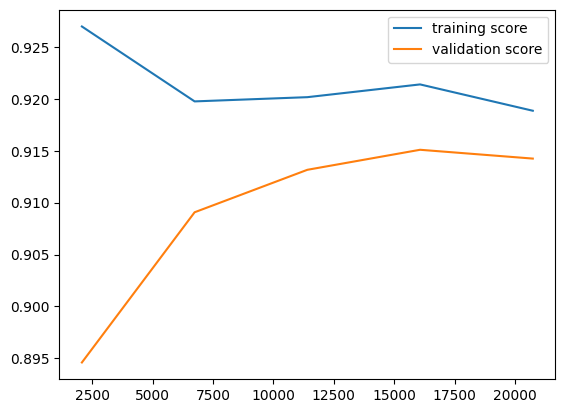

In [ ]:
plt.plot(a,b.mean(axis=1),label="training score")
plt.plot(a,c.mean(axis=1),label="validation score")
plt.legend()
plt.show()

In [ ]:
import joblib

joblib.dump(GB_model,'GB_model.pkl')


['GB_model.pkl']

In [ ]:
GB_model.feature_importances_

array([8.84045489e-04, 2.76677609e-01, 2.27150366e-02, 1.65984063e-01,
       1.56794879e-01, 7.91729127e-06, 3.02775629e-04, 9.94949291e-05,
       2.13429793e-02, 1.21689859e-01, 3.79170213e-02, 8.30100453e-04,
       1.67090368e-02, 2.94070168e-02, 1.39554054e-04, 4.72236482e-03,
       4.95376645e-03, 9.42784977e-04, 1.60829045e-02, 9.92391848e-02,
       1.33349547e-02, 4.02829778e-03, 5.08680702e-03, 0.00000000e+00,
       1.07546688e-04])

In [ ]:
GB_model.feature_names_in_

array(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'], dtype=object)